# gradient descent (경사 하강법)

- Gradient descent 설명
  - http://nobilitycat.tistory.com/entry/Gradient-Descent

- Univariate Linear Regression 에서 gradient descent (경사 하강법) 설명

- Hypothesis Function
$$h_{\theta_0, \theta_1}(x) = \theta_0 + \theta_1 \cdot x$$

- Cost Function $J(\theta_0, \theta_1)$

\begin{eqnarray}
  J(\theta_0, \theta_1) &=& \dfrac{1}{2m} \sum_{i=1}^m \big( h_{\theta_0, \theta_1}(x^i) - y^i \big)^2 \\
  &=& \dfrac{1}{2m}\sum_{i=1}^m \big( \theta_0 + \theta_1\cdot x^i - y^i \big)^2
\end{eqnarray}

- We need derivatives for both $\theta_0$ and $\theta_1$:

\begin{eqnarray}
        \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) &=& \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{i}-y^{i}) \\
        \frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) &=& \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{i}-y^{i})\cdot x^{i}
\end{eqnarray}

#### Batch Gradient Descent
  - 1) Pick an initial value for $\hat \theta $.
  - 2) Compute
  $$ \frac{\partial J}{\partial \theta} = \big( \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}, \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} \big) $$
  - 3) Compute with a proper learning rate $\alpha$
  $$temp_0 := \theta_0 -\alpha \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1)\\
    temp_1 := \theta_1 -\alpha \frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1)$$
  $$\theta_0 := temp_0\\
    \theta_1 := temp_1.$$

  - 4) Repeat 2) and 3) until update is small or reaches iteration maximum.

#### Stochastic (or Incremental) Gradient Descent
  - 1) Pick an initial value for $\hat \theta $.
  - 2) Compute
  $$ \frac{\partial J}{\partial \theta} = \big( \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}, \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} \big) $$
  - 3) Compute with a proper learning rate $\alpha$
    $$\theta_0 := \theta_0 -\alpha \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1)\\
      \theta_1 := \theta_1 -\alpha \frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1).$$

  - 4) Repeat 2) and 3) until update is small or reaches iteration maximum.
  - This method converges to the minimum more rapidly, but has the potential of overshooting the minimum and then oscillating around it.

#### Learning Rate control
  - By slowly letting the learning rate $\alpha$ decrease to zero as the algorithm runs, it is also possible to ensure that the parameters will converge to the global minimum rather then merely oscillate around the minimum.

#### Local Optimum vs. Global optimum

- For linear regression, the cost function $J(\theta)$ does not have a local optimum other than the global optimum.

<img src="http://theroadchimp.com/wp-content/uploads/sites/3/2015/10/413x285ximg_561aee1e36c59.png.pagespeed.ic.0lRwrJgNPb.jpg" border=0 width="50%">

- However, we need to be susceptible to local optima in general cases.

<img src="https://camo.githubusercontent.com/30bf2d42d3a9b0e07dbc03a014f4e36dbc06904f/68747470733a2f2f7261772e6769746875622e636f6d2f7175696e6e6c69752f4d616368696e654c6561726e696e672f6d61737465722f696d61676573466f724578706c616e6174696f6e2f4772616469656e7444657363656e74576974684d75746c69706c654c6f63616c4d696e696d756d2e6a7067" width="60%">

#### Barch Gradient Descent - Python Code.
- We get $\theta_0$ and $\theta_1$ as its output:

In [2]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print 'Converged, iterations: ', iter, '!!!'
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print 'Max interactions exceeded!'
            converged = True

    return t0,t1

- Data Preparation
  - [Note]: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [3]:
from sklearn.datasets.samples_generator import make_regression 
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=35) 
print 'x.shape = %s, y.shape = %s' % (x.shape, y.shape)
print x[0:5]
print y[0:5]

x.shape = (100, 1), y.shape = (100,)
[[-2.04952781]
 [-0.43153213]
 [ 0.09858666]
 [-1.01328069]
 [ 1.93555916]]
[ -82.10317641 -118.249632    -11.85958046 -111.97082092   72.50576718]


- Do gradient descent!

In [4]:
alpha = 0.01 # learning rate
ep = 0.01 # convergence criteria

# call gredient decent, and get intercept(=theta0) and slope(=theta1)
theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=10000)
print ('theta0 = %s, theta1 = %s') %(theta0, theta1) 

# check with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print ('intercept = %s, slope = %s') %(intercept, slope) 

Converged, iterations:  712 !!!
theta0 = [ 3.29752334], theta1 = [ 51.72813087]
intercept = 3.31458577872, slope = 51.8034956124


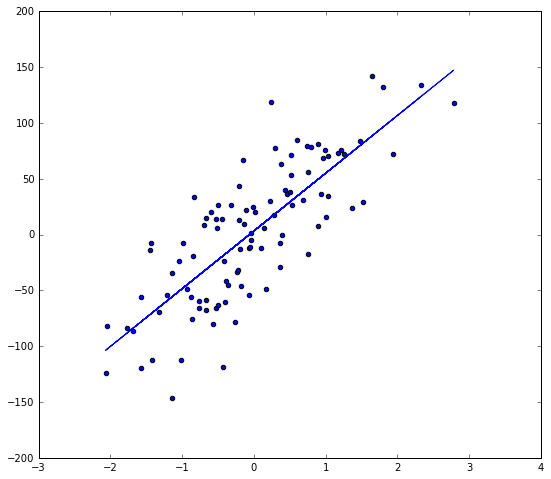

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(9, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(x[:,0], y)

y_predict = theta0 + theta1*x 
ax1.plot(x[:,0], y_predict)